In [56]:
from utils.visual import *
import torch
import matplotlib.pyplot as plt
import os

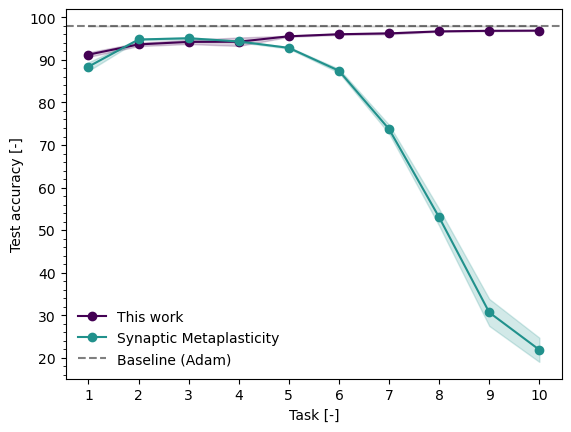

In [62]:
n_iterations = 5
paths = [
    "./paper/saved_results/2024-06-26-15h48:22-BHUparallel-BS128-512-PermutedMNIST-gate-v1",
    "./paper/saved_results/2024-06-26-16h15:31-MetaplasticAdam-BS128-512-PermutedMNIST-gate-v1"
]
model_names = [
    "This work", 
    "Synaptic Metaplasticity"
]

models = []
for path in paths:
    accuracies = []
    for it in range(n_iterations):
        accuracies.append(torch.load(os.path.join(path, f"params-network-{it}", "accuracy.pt")))
    models.append(accuracies)
    
fig, ax = plt.subplots()
palette = plt.get_cmap('viridis', len(models)+1)
for i, model in enumerate(models):
    mean, std = get_mean_std_accuracies(model, t_start=1, t_end=10)
    ax.plot(mean, color=palette(i), label=model_names[i], marker="o")
    ax.fill_between(np.arange(0, 10), mean-std, mean+std, color=palette(i), alpha=0.2)

# hline: fully connected
ax.axhline(y=97.95, color="black", linestyle='--', alpha=0.5, label="Baseline (Adam)")
ax.fill_between(np.arange(0, 10), 97.95-0.05, 97.95+0.05, color="black", alpha=0.2)


ax.set_xticks(np.arange(0, 10, 1))
ax.set_xticklabels(np.arange(1, 11, 1))
ax.set_xlabel("Task [-]")
ax.set_ylabel("Test accuracy [-]")
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.legend(frameon=False)

title = versionning(folder="./paper/figures", title="permutedMNIST", format=".pdf")
plt.savefig(title, format="pdf", bbox_inches='tight')
plt.savefig(title.replace(".pdf", ".svg"), format="svg", bbox_inches='tight')

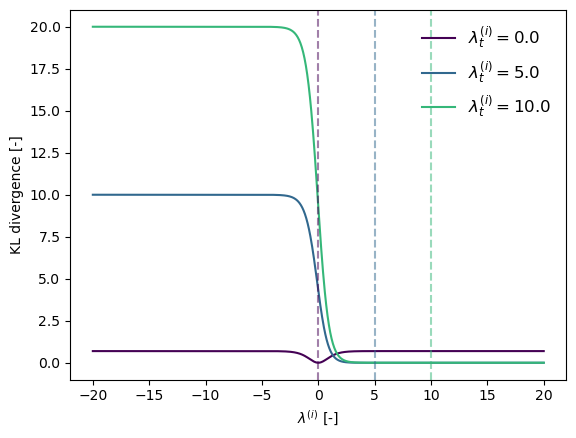

<Figure size 640x480 with 0 Axes>

In [58]:
lambda_t = torch.tensor([0, 5, 10])
lambda_ = torch.linspace(-20, 20, 1000)

# KL divergence
kl = lambda lambda_, lambda_t: torch.tanh(lambda_)*(lambda_-lambda_t) + 1/2 * torch.log(torch.cosh(lambda_t)**2 / torch.cosh(lambda_)**2)
cm = plt.get_cmap('viridis', len(lambda_t)+1)
# plot 
for i, lbd_t in enumerate(lambda_t):
    plt.plot(lambda_, kl(lambda_, lbd_t).detach().numpy(), label=r'$\lambda^{(i)}_t' + f'={lbd_t:.1f}$', color=cm(i))
plt.xlabel(r'$\lambda^{(i)}$ [-]')
plt.ylabel('KL divergence [-]')
for i, lbd_t in enumerate(lambda_t):
    plt.axvline(lbd_t, linestyle='--', alpha=0.5, color=cm(i))
plt.legend(frameon=False, fontsize=12)
plt.show()
# save as pdf and svg
os.makedirs('paper', exist_ok=True)
plt.savefig('paper/kl_divergence.pdf', bbox_inches='tight')
plt.savefig('paper/kl_divergence.svg')

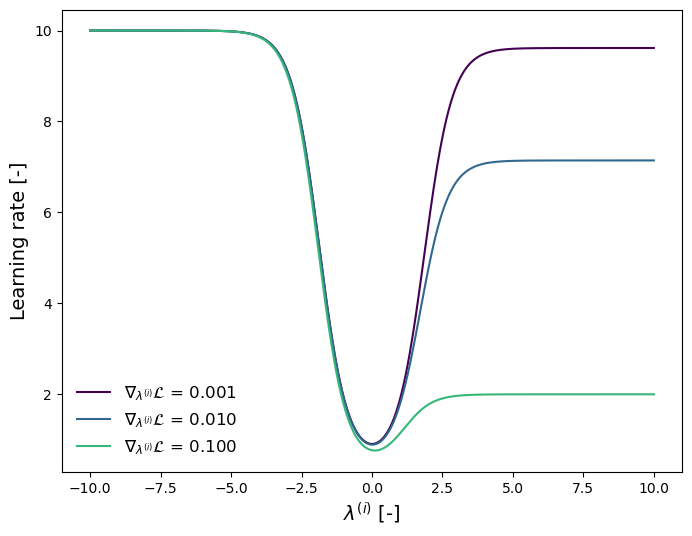

In [59]:
 # plot 1/cosh²(x)
x = torch.linspace(-10, 10, 1_000)
grads = torch.tensor([0.001, 0.01, 0.1])
alpha = 10
# color map viridis
cm = plt.get_cmap('viridis', len(grads)+1)
plt.figure(figsize=(8, 6))
for index, grad in enumerate(grads):
    f = 1/(1/torch.cosh(x)**2 + grad*2*torch.tanh(x) + 2*torch.abs(grad) + 1/alpha)
    plt.plot(x, f, label=r'$\nabla_{\lambda^{(i)}}\mathcal{L}$'+ f' = {grad:.3f}', color=cm(index))
plt.ylabel(r'Learning rate [-]', fontsize=14)
plt.legend(fontsize=12, frameon=False, loc='lower left')
plt.xlabel('$\lambda^{(i)}}$ [-]', fontsize=14)

# save as pdf and svg
plt.savefig('paper/learning_rate.pdf', bbox_inches='tight')
plt.savefig('paper/learning_rate.svg')
plt.show()

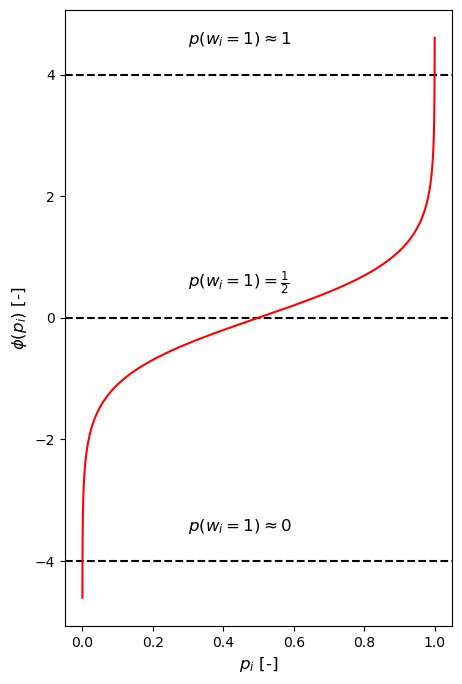

In [60]:
p = torch.arange(0, 1, 0.0001)
fct = 1/2 *torch.log(p/(1-p))
# add grid
fig, ax = plt.subplots(figsize=(5, 8))
# dashed line at y=0
ax.axhline(y=0, color='black', linestyle='--')
ax.axhline(y=4, color='black', linestyle='--')
ax.axhline(y=-4, color='black', linestyle='--')
# write a text above each dashed line corresponding to p=0, p=1/2, p=1
ax.text(0.3, 0.5, r'$p(w_i = 1) = \frac{1}{2}$', fontsize=12)
ax.text(0.3, 4.5, r'$p(w_i = 1) \approx 1$', fontsize=12)
ax.text(0.3, -3.5, r'$p(w_i = 1) \approx 0$', fontsize=12)

ax.set_xlabel(r'$p_i$ [-]', fontsize=12)
ax.set_ylabel(r'$\phi(p_i)$ [-]', fontsize=12)
ax.plot(p, fct, color='red')
 

In [61]:
hessian = torch.load("hessian/hessian.pt")[-1].reshape(-1).detach().cpu()
lambda_ = torch.load("hessian/lambda.pt").reshape(-1).detach().cpu()
grad = torch.load("hessian/gradient.pt")[-1].reshape(-1).detach().cpu()

plt.figure()
# Plot y = hessian and x = lambda
plt.scatter(lambda_, hessian, c='b', marker='o')
plt.xlabel('$\lambda$ [-]')
plt.ylabel(r'Hessian diagonal w.r.t $\lambda$ [-]')
plt.show()

p = torch.sigmoid(2*lambda_)
dlbddp = 1/(2*p - (2*p)**2 + 1e-5)
dlbddp2 = (2*p-1) / (2*(p-1)**2 * p**2+ 1e-5)
dLdp2 = hessian * dlbddp**2 + dlbddp2*grad
plt.scatter(p, hessian, c='r', marker='o')
plt.xlabel('$p$ [-]')
plt.ylabel(r'Hessian diagonal w.r.t p [-]')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'hessian/hessian.pt'